# **$K$-Means con `scikit-learn`**


---
---

K-means es el algoritmo más popular de [clustering](https://github.com/Bronquivoide/Proyectos_de_Machine_Learning_/blob/main/Unsupervised%20Learning/Clustering.pdf). Es una técnica particional que intenta encontrar un número ($K$) de clusters especificado por el usuario, los cuales están representados por sus centroides.

---

### **Algoritmo $K$-means**

Sea $D_{train}= \{\vec{x}_i \in \mathbb{R}^d\}_{i=1}^N$ el conjunto de entrenamiento. El objetivo del modelo K-means es agrupar estos vectores de características en $K$ clusters mediante el siguiente algoritmo:


1. Especificar el número $K$ de clusters a crear.

**Repetir:**

2. Seleccionar aleatoriamente $K$ puntos del conjunto $D_{train}$ que actúen como centroides de los $K$ clusters a crear:

$$
\text{Sea }D_K=\{\vec{x}_j \in D_{train}\}_{j=1}^K ⊂ D_{train}\text{,}
$$

$$
\text{entonces usamos } D_K \text{ como } \{\vec{μ}_j \in \mathbb{R}^d\}_{j=1}^K
$$

3. Formar $K$ clusters asignando los elementos $\vec{x}_i \in D_{train}- D_K $ al centroide más cercano:

$$
\forall i \in \{1,...,N\}, j \in \{1,...,K\}, \text{ establecemos:}
$$

$$
c_i=ArgMin_j \{ ||\vec{x}_i - \vec{μ}_j ||^2\}
$$

4. Para cada uno de los $K$ clusters, recalcular su centroide:

$$
\forall j \in \{1,...,K\}, i \in \{1,...,N\}, \text{ establecemos:}
$$

$$
\vec{μ}_j= \frac{\sum _{i=1}^N 𝟙\{c_i =j\} \cdot \vec{x}_i}{\sum _{i=1}^N 𝟙 \{c_j =j\}}
$$

$$
\text{En donde } 𝟙 : D_{train} \rightarrow \{0,1\} \text{, mediante }
$$

$$
𝟙(arg)=  \begin{cases}
1 \text{, si } arg=True\\
0 \text{, si } arg=False
\end{cases}
$$

**Hasta que:**

(Los siguientes conceptos son equivalentes)

* Idealmente se halle el mínimo global de $J=\sum _{i=1}^N ||\vec{x}_i - \vec{μ}_{c_i} ||^2$.

* Halla convergencia.

* Los centroides ya no cambien.

---

### **La función de pérdida o distorsión**

* En el algoritmo K-means definimos la siguiente función de pérdida como métrica:

$$
J(c, \vec{\mu})= \sum _{i=1}^N ||\vec{x}_i - \vec{μ}_{c_i} ||^2
$$

* En $J$ pueden usarse otras métricas de distancia para la función de pérdida como Manhattan o las que se vieron en la teoría del algoritmo [K-NN](https://github.com/Bronquivoide/Proyectos_de_Machine_Learning_/blob/main/Supervised%20Learning/K-NN/K_NN.ipynb).

* Minimizar $J$ tal que se halle el mínimo global es complejo debido a la cantidad de formas en que se pueden dividir los datos, esto puede llevar a un costo computacional alto.

* Como el problema de optimización de $J$ depende de cómo se inicien los centroides, hablamos de un problema de optimización no convexa.

---

### **Hiperparámetros en K-means**

* **El problema de optimización en la práctica:**

Retomando los puntos anteriores, desarrollar el algoritmo K-means hasta hallar el mínimo global de $J(c, \vec{\mu})$ puede llegar a ser muy complejo e implicar un costo computacional alto, y si no podemos llegar al mínimo global, podemos quedar atrapados en un mínimo local, conllevando a resultados poco precisos. Para controlar esta situación en la práctica, surge la necesidad de formular un conjunto de hiperparámetros. Los dos
hiperparámetros principales relativos a este problema en `scikit-learn` son:


1. `init = 'método'`:

   Este argumento define el método para inicializar los centroides y tiene dos métodos, `'k-means++'` y `'random'`. El método `init = 'random'` selecciona los $K$ centroides iniciales completamente al azar entre los puntos del conjunto de datos, por lo que no considera la distribución ni las distancias entre los puntos. Siendo que hablamos de un problema de optimización no convexa, la elección inicial de los centroides puede afectar significativamente el resultado final, pues el algoritmo puede arrojar mínimos locales, llevando a resultados pocos precisos.

   Por otro lado, el método `init = 'k-means++'` permite elegir más apropiadamente los centroides iniciales para mejorar la convergencia, pues trabaja calculando distancias mínimas entre centroides hasta obtener $K$centroides iniciales, mejorando la convergencia . Este argumento es por default.


2. `n_init = número_natural`:

   Este argumento define el número de veces que se ejecutará el algoritmo con diferentes inicializaciones, pues como vimos, K-means puede quedarse en mínimos locales y cuanto mayor el valor, más probabilidades hay de encontrar el mínimo global, o una mejor solución. De esta manera controlamos el costo computacional del algoritmo.

   Este hiperparámetro mejora la robustez del modelo al evitar malos mínimos locales. Comunmente se recomienda repetir el proceso de 20 a 50 veces y seleccionar el valor de $J(c, \vec{\mu})$ más chico. Por defecto, `n_init = 10`.


También hay otros hiperparámetros como `max_iter` que recibe un entero, el cual define el número máximo de iteraciones permitidas por ejecución de K-means, controlando así el tiempo de entrenamiento. O `tol` que recibe un flotante y que se asocia a la tolerancia para determinar la convergencia.

* **El número $K$ de clusters a crear:**

Es el principal hiperparámetro, pues definirlo es el primer paso del algoritmo.

Como se mencionó, K-means es un modelo de aprendizaje no supervisado, es decir, no tiene etiquetas para ayudarnos a evaluar el rendimiento del modelo probando distintos valores de este hiperparámetro mediante [Cross-Validation](https://), por lo que algoritmos como Grid Search o Randomized Search no son aplicables en este caso.

Para lidiar con esta situación, se han desarrollado diversos métodos tal que se nos permita determinar un $K$ óptimo. Aquí expondremos dos:

1. El método del codo.

2. El método del coeficiente de Silhouette.


---

### **El método del codo para el $K$ óptimo**

El método del codo o el codo de Jambú consiste en lo siguiente:

1. Se elige un rango, un intervalo del número de clusters posibles. Por ejemplo, $K \in [1,10]⊂ \mathbb{N}$ (`K=range(1,11)`).

2. Se grafica la función de pérdida $J$ contra el número de clusters $K$. En el caso expuesto, la métrica es $J=J(c, \vec{\mu})= \sum _{i=1}^N ||\vec{x}_i - \vec{μ}_{c_i} ||^2$. Comúnmente esta métrica recibe distintos nombres como *Within Cluster Sum of Squares* (*WCSS*) o inercia.

3. Se toma el cluster óptimo como aquel donde la pendiente de la gráfica de $J$ en función de $K$ presente un cambio brusco, formando una especie de codo en la curva. Consideremos el siguiente ejemplo tomado de *Kavlakoglu, E., & Winland, V. (s.f.). What is k-means clustering? IBM. https://www.ibm.com/think/topics/k-means-clustering* en donde el $K$ óptimo es 3:

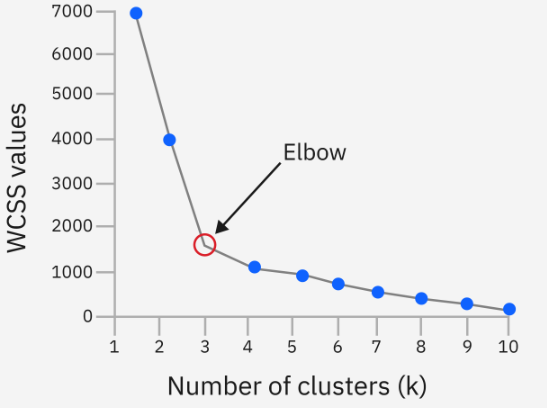













El problema con el método del codo es que se toma visualmente, por lo que puede llegar a no ser claro e incluso ser subjetivo. Por ello es que se desarrollan otros métodos como el siguiente que veremos.

---

### **El método Silhouette para el  K  óptimo**

El método del coeficiente de Silhouette permite evaluar la calidad del clustering y elegir el $K$ óptimo.

**Coeficiente de Silhouette:**

Sea $D_{train}= \{\vec{x}_k \in \mathbb{R}^d\}_{k=1}^N$ el conjunto de entrenamiento, para un punto individual $\vec{x}_i$ en este conjunto, calculamos el coeficiente de Silhouette mediante el siguiente algoritmo:

1. Para el datapoint $\vec{x}_i$ agrupado en el cluster $C_I$ ($\vec{x}_i \in C_I$, en donde $|C_I|$ es la cardinalidad de ese cluster), se calcula su distancia promedio, $a(\vec{x}_i)$, a los demás datapoints en el mismo cluster:

$$
a(\vec{x}_i)= \frac{1}{|C_I|-1} \sum _{m \neq i} d(\vec{x}_i, \vec{x}_m)
$$

2. Sea $C_J$ otro cluster distinto a $C_I$. Para $\vec{x}_i \in C_I$ se calcula su distancia promedio ($b(\vec{x}_i)$) mínima a cada datapoint $\vec{x}_j \in C_J$:

$$
b(\vec{x}_i)=Min_{J \neq I}\{ \frac{1}{|C_J|} \sum _{j \neq i} d(\vec{x}_i, \vec{x}_j)\}
$$

3. Para $\vec{x}_i \in C_I$, definimos el coeficiente de Silhouette como:

$$
S(\vec{x}_i)= \begin{cases}
1 - \frac{a(\vec{x}_i)}{b(\vec{x}_i)}, \text{ si } a(\vec{x}_i) < b(\vec{x}_i)\\
0, \text{ si } a(\vec{x}_i)=b(\vec{x}_i) \\
\frac{b(\vec{x}_i)}{a(\vec{x}_i)} -1 , \text{ si } a(\vec{x}_i) > b(\vec{x}_i)
\end{cases}
$$

Este coeficiente toma valores en el intervalo real $-1 \leq S(\vec{x}_i) \leq 1$.

Idealmente buscamos dos cosas:

* $S>0$, es decir, $a(\vec{x}_i) < b(\vec{x}_i)$

* $a(\vec{x}_i) \approx 0$ tanto como sea posible, pues si $a(\vec{x}_i)=0$, entonces $S(\vec{x}_i)=1$ (el máximo valor).

**El método de Silhouette:**

Para hallar $K$ óptimo, a partir del coeficiente de Silhouette, se desarrolla el siguiente algoritmo:

1. Aplicar K-means para varios valores de $K$.

2. Calcular el coeficiente de Silhouette promedio para cada $K$ de acuerdo a los datos de entrenamiento. El promedio permite un resumen global que evalúa la calidad del modelo calculando $S$ para cada $\vec{x}_k$:

$$
\overline{S}= \frac{1}{N} \sum _{k=1}^N S(\vec{x}_k)
$$

3. Graficar $\overline{S}$ vs $K$.

4. Elegir $K$ tal que maximice a $\overline{S}$.


**Evaluación de la calidad del clustering:**

* La métrica $\overline{S}$ toma valores en el intervalo $-1 \leq \overline{S} \leq1$

* Idealmente buscamos $\overline{S} \approx 1$ tanto como sea posible.

* Si $\overline{S} \rightarrow 1$, hablamos de buena separación entre clústeres. Las agrupaciones están bien definidas.

* Si $\overline{S} \rightarrow 0$, los clústeres se superponen, están poco definidos.

* Si $\overline{S} \rightarrow 1$, hablamos de muchos puntos mal asignados, los clusters no son precisos y los datapoints están más cerca de otro cluster que del propio.

---

### **Consideraciones de K-means con `scikit-learn`**

* Como el algoritmo se basa en distancias entre datapoints, llega a presentar problemas trabajando con outliers, así que estos hay que abordarlos correctamente o recurrir a otro método de clustering como K-medoids.

* Observar gráficamente los clusters creados por el modelo solo es posible para datos bidimensionales. Es decir, solo podríamos tomar dos características (columnas) para observar las agrupaciones de los vectores.

* Tradicionalmente, K-Means recibe un arreglo NumPy. Aunque puede recibir dataframes de Pandas dependiendo de la versión de `scikit-learn`.

---

### **Sintaxis de K-means en `scikit-learn`**

**Sintaxis general con los valores por defecto:**

```
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Definimos el conjunto de entrenamiento:
X = TrainingData

#Llamando al algoritmo y definiendo sus hiperparámetros:
kmeans = KMeans(n_clusters, random_state)

#Ajustando el modelo a los datos:
kmeans.fit(X)

#Obteniendo las etiquetas de los clusters asignados a cada punto:
labels = kmeans.labels_

#Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_

#Graficando los datos sin agrupaciones:
plt.scatter(X[:, i], X[:, j], s=50) #i y j representan dos características (columnas)
plt.xlabel("Característica i")
plt.ylabel("Característica j")
plt.title("Datapoints sin agrupar")
plt.grid(True)
plt.show()

#Graficando los datapoints según su cluster (hay muchos otros formatos como mapas de calor):
plt.scatter(X[:, i], X[:, j], c=labels, cmap='viridis', s=50)
plt.scatter(centroids[:, i], centroids[:, j], c='red', s=200,
                                alpha=0.75, marker='X', label='Centroides')
plt.title("Clusters Formados")
plt.xlabel("Característica i")
plt.ylabel("Característica j")
plt.legend()
plt.grid(True)
plt.show()

```

**K-means por el método del codo:**

```
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#Definiendo un rango para los valores de K:
inertia = [] #WCSS
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  #Valores de WCSS en función de K

# Graficar el método del codo
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Inercia o WCSS')
plt.title('Método del codo para seleccionar k')
plt.grid(True)
plt.show()

#Definiendo el K óptimo y ajustando el modelo:
k_optimo = número_entero
kmeans = KMeans(n_clusters=k_optimo, random_state, n_init)
y_kmeans = kmeans.fit_predict(X)

#kmeans.fit_predict(X) ajusta el modelo y devuelve las etiquetas de los clusters,
#es equivalente al proceso en las líneas: kmeans.fit(X) y labels = kmeans.labels_

```

**K-means por el método de Silhouette:**


```
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Definiendo un rango para los valores de K:
silhouette_scores = []
k_range = range(2, 11) #Por definición no se puede calcular el coef. Silh. para un cluster

#Coeficiente de Silhouette para diferentes valores de K:
for n_clusters in k_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"K={n_clusters}, Silhouette Score={silhouette_avg:.4f}")

#El K óptimo (al que se le asocie el mayor Silhouette Score):
best_k_index = np.argmax(silhouette_scores)
best_k = k_range[best_k_index]
print(f"El K óptimo según Silhouette Score es: {best_k}")

#Entrenando el modelo con el K óptimo:
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
kmeans_final.fit(X)
labels = kmeans_final.labels_

#Visualizando el coeficiente de Silhouette:
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel("Número de clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Método de Silhouette para determinar el K óptimo")
plt.grid(True)
plt.show()
```

# **Proyecto:**

# **Segmentación de clientes como estrategia de marketing en un centro comercial mediante un modelo K-Means**

* El objetivo es realizar una segmentación de clientes en un centro comercial, agrupándolos mediante el algoritmo K-means para implementar una estrategia de marketing que mejore la retención de clientes y reduzca su abandono.

* El formar clusters depermitirá personalizar estrategias de marketing para cada tipo o grupo de clientes. Para esto se trabajará un dataset conocido como Mall Customers, el cual contiene información básica (que parece ser sintética) de las membresías de los clientes en un centro comercial.

* Las variables con información más relevante para el objetivo del proyecto son el ingreso anual y los gastos realizados en el centro comercial. En este caso, el gasto se cuantifica mediante un puntaje formulado por la tienda

* Mediante las dos características anteriores agruparemos a los clientes de acuerdo a la relación ingresos-gastos, permitiendo generar ofertas y beneficios exclusivos que mejoren la retención para cada grupo de clientes.

# Importación de datos

In [251]:
import requests
import chardet

url = "https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv"

response = requests.get(url)
rawdata = response.content[:5000]

result = chardet.detect(rawdata)
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [252]:
import pandas as pd

df = pd.read_csv(url, encoding="ascii")
display(df.head())
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

print(df.info())
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

print(df.columns)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


# EDA

Definiendo el dataset.

Vamos a conservar la columna con el ID de la membresía de los clientes para reconocerlos, mientras que las columnas de interés para el modelo de acuerdo a los objetivos son dos:

In [253]:
#Definiendo el conjunto de datos de entrenamiento (matriz de diseño)
X=df[['CustomerID', 'Annual Income (k$)', 'Spending Score (1-100)']]
display(X.head())
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

print(f'Tenemos {X.shape[0]} vectores de características que serán bidimensionales en el modelo K-Means.')

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
Tenemos 200 vectores de características que serán bidimensionales en el modelo K-Means.


Recordando que K-means trabaja con distancias entre datos, vamos a abordar los outliers:

       Annual Income (k$)  Spending Score (1-100)
count          200.000000              200.000000
mean            60.560000               50.200000
std             26.264721               25.823522
min             15.000000                1.000000
25%             41.500000               34.750000
50%             61.500000               50.000000
75%             78.000000               73.000000
max            137.000000               99.000000
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°


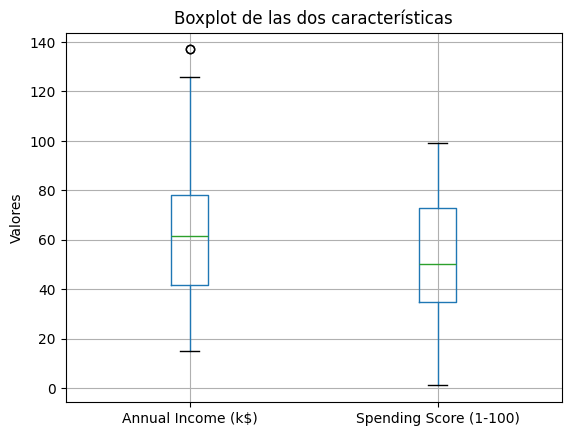

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Estadística de las columnas de interés
print(X[['Annual Income (k$)', 'Spending Score (1-100)']].describe())
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

#Boxplots
X.iloc[:, 1:3].boxplot()
plt.title("Boxplot de las dos características")
plt.ylabel("Valores")
plt.show()

Vemos que solo tenemos un outlier para la columna de ingreso anual. Una de las formas de tratar este valor atípico podría ser mapearlo tal que este cliente quede agrupado en un cluster con beneficios y ofertas adecuadas para él.

Sin embargo, se sugiere que la forma de agrupar al cliente sea un cluster exclusivo para este. Es decir, generar beneficios y promociones exclusivamente para él, pues por sus ingresos anuales puede ser motivado a generar más puntaje de gasto, brindando así más ingresos al centro comercial.

In [255]:
#El cliente con mayor ingreso:
ingreso=X['Annual Income (k$)'].max()
print(f'El ingreso máximo es de ${ingreso}k.')
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

cliente_ID = X.loc[[X['Annual Income (k$)'].idxmax()]]
print(f'El ID del cliente con mayor ingreso es: {cliente_ID["CustomerID"].values[0]}.')

El ingreso máximo es de $137k.
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
El ID del cliente con mayor ingreso es: 199.


Definiendo el nuevo dataset sin el cliente sobre el que se implementará una estrategia exclusiva:

In [256]:
#Dataset adecuado
X=X.drop([X['Annual Income (k$)'].idxmax()])
print(f'Ahora tenemos {X.shape[0]} vectores de características.')
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

print(X.columns)


Ahora tenemos 199 vectores de características.
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
Index(['CustomerID', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


In [257]:
X= X.drop('CustomerID', axis=1)
print(X.columns)

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


In [258]:
X=X.values #Formato de NumPy array para grficar y para el modelo

Visualizando los datos previo al clustering:


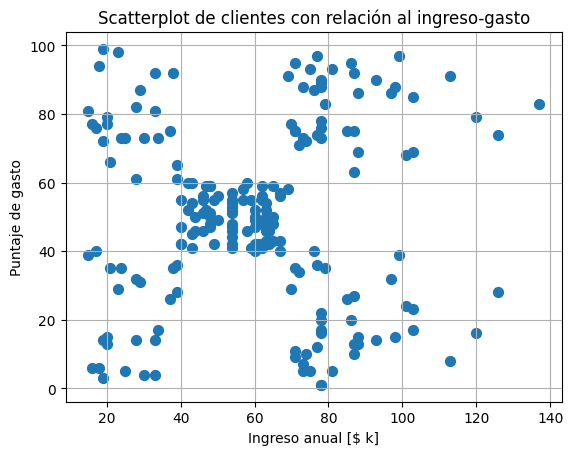

In [259]:
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.xlabel("Ingreso anual [$ k]")
plt.ylabel("Puntaje de gasto")
plt.title("Scatterplot de clientes con relación al ingreso-gasto")
plt.grid(True)
plt.show()

# Modelo K-Means

Vamos a usar el método del codo para determiner el $K$ óptimo, y vamos a ver cómo es su Silhouette score promedio para evaluar la calidad del clustering.

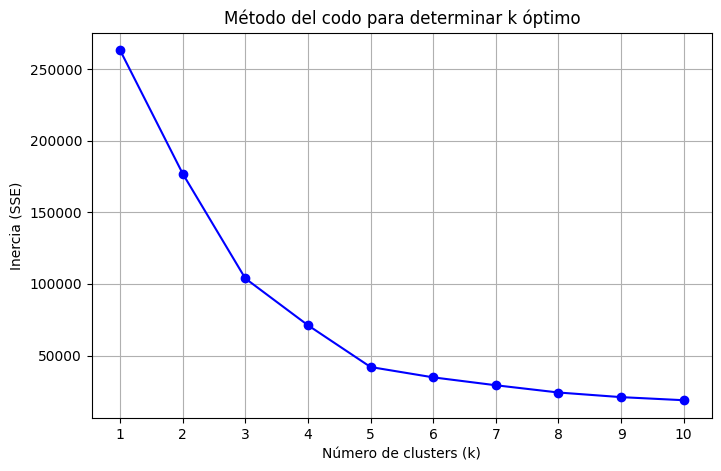

In [260]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=50)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (SSE)")
plt.title("Método del codo para determinar k óptimo")
plt.grid(True)
plt.xticks(K_range)
plt.show()

Hay dos valores de $K$ que llaman la atención, $K_1 =3$ y $ K_2 =5$, vamos a ver cuál tiene mejor valor Silhouette.

In [261]:
#Modelo con K=3
kmeans_1 = KMeans(n_clusters=3, random_state=42, n_init=50)
y_kmeans_1 = kmeans_1.fit_predict(X)
silhouette_1 = silhouette_score(X, y_kmeans_1)
print(f"Coeficiente de Silhouette para k=3: {silhouette_1: .2f}")

#Modelo con K=5
kmeans_2 = KMeans(n_clusters=5, random_state=42, n_init=50)
y_kmeans_2 = kmeans_2.fit_predict(X)
silhouette_2 = silhouette_score(X, y_kmeans_2)
print(f"Coeficiente de Silhouette para k=5: {silhouette_2: .2f}")


Coeficiente de Silhouette para k=3:  0.47
Coeficiente de Silhouette para k=5:  0.56


El modelo con mejor coeficiente de Silhouette es aquel donde se establece el hiperpatámetro $K=5$.

Vamos a hacer una validación secundaria para probar directamente el método de Silhouette:

In [262]:
# Definiendo un rango para los valores de K:
silhouette_scores = []
k_range = range(2, 11)

# Coeficiente de Silhouette para diferentes valores de K:
for n_clusters in k_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=50)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"K={n_clusters}, Silhouette Score={silhouette_avg:.2f}")

# El K óptimo (al que se le asocie el mayor Silhouette Score):
best_k_index = np.argmax(silhouette_scores)
best_k = k_range[best_k_index]
print(f"El K óptimo según Silhouette Score es: {best_k}")

K=2, Silhouette Score=0.29
K=3, Silhouette Score=0.47
K=4, Silhouette Score=0.50
K=5, Silhouette Score=0.56
K=6, Silhouette Score=0.54
K=7, Silhouette Score=0.46
K=8, Silhouette Score=0.46
K=9, Silhouette Score=0.46
K=10, Silhouette Score=0.45
El K óptimo según Silhouette Score es: 5


Visualización de los clusters creados:

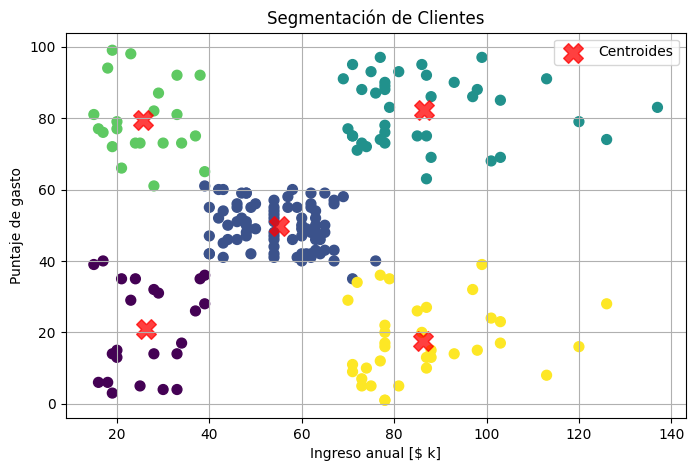

In [264]:
# Obteniendo las etiquetas de los clusters en el modelo óptimo kmeans_2:
labels = kmeans_2.labels_

# Obtener los centroides de los clusters
centroids = kmeans_2.cluster_centers_

plt.figure(figsize=(8,5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200,
                                alpha=0.75, marker='X', label='Centroides')
plt.title("Segmentación de Clientes")
plt.xlabel("Ingreso anual [$ k]")
plt.ylabel("Puntaje de gasto")
plt.legend()
plt.grid(True)
plt.show()

# Conclusión del modelo:

Vemos que el puntaje ideal es $\overline{S} = 1$, aquí se obtuvo $\overline{S} \approx 0.56$.

Apoyándonos de la gráfica de clusters, podemos ver que las agrupaciones están bien definidas, se reconoce bien la estructura de los clusters. Sin embargo, hay datapoints agrupados de una manera ambigua, podemos ver algunos puntos que podrían pertenecer a otro cluster.

El modelo es aceptable, aunque no ideal.